In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

In [ ]:
df = pd.read_csv(f"D:\Ahmad\projects\Python\Cars EDA\data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,Manual,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,Manual,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,Manual,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,Manual,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,Manual,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11911 non-null  object 
 4   Engine HP         11889 non-null  float64
 5   Engine Cylinders  11884 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Driven_Wheels     11914 non-null  object 
 8   Number of Doors   11908 non-null  float64
 9   Market Category   8172 non-null   object 
 10  Vehicle Size      11914 non-null  object 
 11  Vehicle Style     11914 non-null  object 
 12  highway MPG       11914 non-null  int64  
 13  city mpg          11914 non-null  int64  
 14  Popularity        11914 non-null  int64  
 15  MSRP              11914 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memor

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11889.000000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,248.463117,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,110.036696,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,0.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.isnull().sum()

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
Engine HP             25
Engine Cylinders      30
Transmission           0
Driven_Wheels          0
Number of Doors        6
Market Category     3742
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64

In [7]:
df["Market Category"].fillna("Unknown",inplace = True)

In [8]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP           25
Engine Cylinders    30
Transmission         0
Driven_Wheels        0
Number of Doors      6
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [10]:
# adding 0 horsepower to tesla models instead of N/A
df["Engine HP"].fillna(0,inplace = True)

In [11]:
df[df["Make"]== "Tesla"].head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6921,Tesla,Model S,2014,electric,0.0,0.0,Direct_Drive,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,90,88,1391,79900
6922,Tesla,Model S,2014,electric,0.0,0.0,Direct_Drive,rear wheel drive,4.0,"Exotic,Performance",Large,Sedan,97,94,1391,69900


In [118]:
df.rename(columns ={"highway MPG":"highway mpg"},inplace =True )

# EDA and Visuals

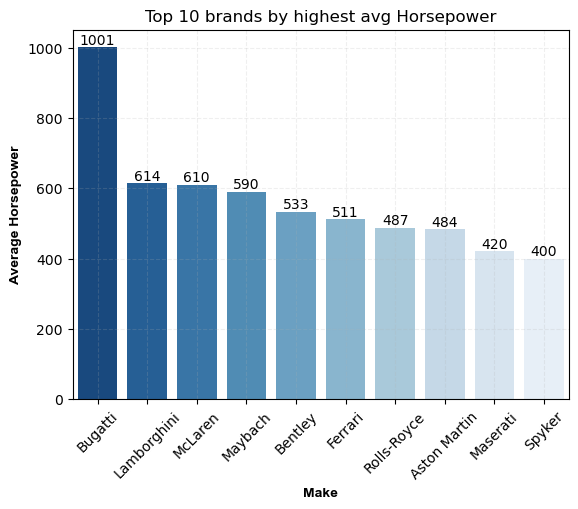

In [123]:
brand_avg_HP = df.groupby("Make")["Engine HP"].mean().reset_index().sort_values(by = "Engine HP",ascending = False)
avg_hp = sns.barplot(data = brand_avg_HP.head(10),x= "Make",y = "Engine HP",palette = "Blues_r")
plt.title("Top 10 brands by highest avg Horsepower")
plt.xticks(rotation = 45)
for p in avg_hp.patches:
    height = p.get_height()
    avg_hp.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,                   # y-position (just above the bar)
        f'{int(height)}',               # Value to display
        ha='center',                    # Horizontal alignment
        va='bottom'                     # Vertical alignment
    )
plt.grid(True, linestyle="--", alpha=0.2) 
plt.ylabel("Average Horsepower",fontweight='bold',fontfamily = "Arial",fontsize = 10)
plt.xlabel("Make",fontweight='bold',fontfamily = "Arial")
plt.show()

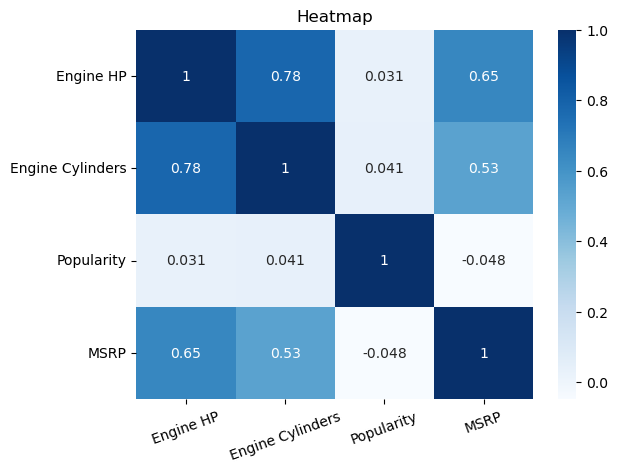

In [13]:
# heatmap of numeric variables and how they affect popularioty
corr_matrix = df[["Engine HP","Engine Cylinders","Popularity","MSRP"]].corr()
heatmap = sns.heatmap(corr_matrix, annot = True,cmap = "Blues",cbar = True)
plt.title("Heatmap")
plt.xticks(rotation = 20)
plt.show()

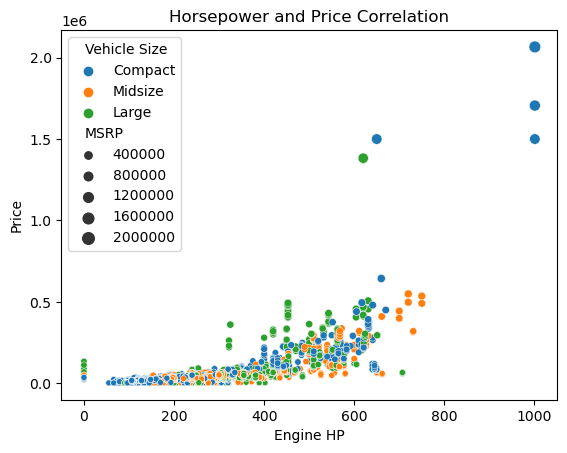

In [14]:
# Engine  horsepower correllation with price
sns.scatterplot(data = df,x="Engine HP",y="MSRP",size = "MSRP",legend ="brief" ,hue = "Vehicle Size")
plt.title("Horsepower and Price Correlation")
plt.ylabel("Price")
plt.show()

In [17]:
# Brands by average MSRP 
avg_prices = df.groupby("Make").agg(mean_MSRP = ("MSRP","mean"),Car_Count = ("Make","count")).reset_index().sort_values(by = ["mean_MSRP","Car_Count"], ascending = [False,False]).reset_index(drop = True)
avg_prices.insert(0,"Rank",avg_prices.index + 1)

avg_prices["mean_MSRP"] = avg_prices["mean_MSRP"].astype(int)  # Ensure conversion
avg_prices.head(10)


,Rank,Make,mean_MSRP,Car_Count
0,1,Bugatti,1757223,3
1,2,Maybach,546221,16
2,3,Rolls-Royce,351130,31
3,4,Lamborghini,331567,52
4,5,Bentley,247169,74
5,6,McLaren,239805,5
6,7,Ferrari,238218,69
7,8,Spyker,213323,3
8,9,Aston Martin,197910,93
9,10,Maserati,114207,58


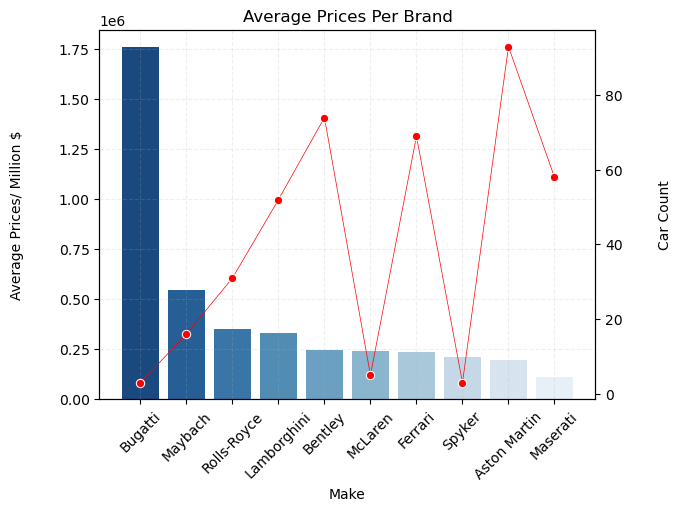

In [18]:
fig, ax1 = plt.subplots() #Create figure and primary axis
sns.barplot(data = avg_prices.head(10),x="Make",y="mean_MSRP",palette = "Blues_r")
plt.xticks(rotation = 45)
plt.ylabel("Average Prices/ Million $",labelpad = 25)
plt.grid(True,linestyle = "--",alpha = 0.2)
plt.title("Average Prices Per Brand")
ax2 = ax1.twinx() 
sns.lineplot(data = avg_prices.head(10),x="Make",y="Car_Count",color = "Red",marker = "o",linewidth = 0.5,ax =ax2)
plt.ylabel("Car Count", labelpad = 25)
plt.show()

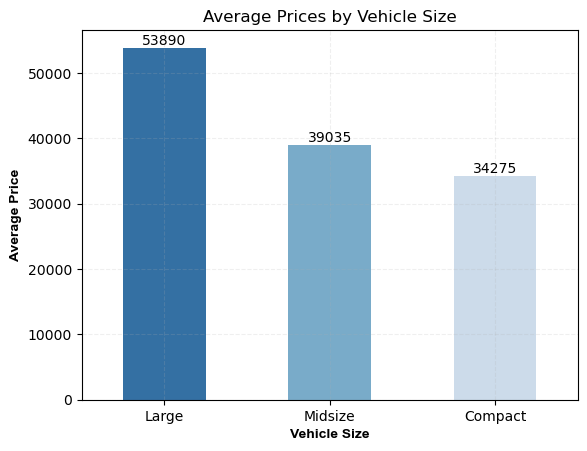

In [20]:
vehicle_size_prices = df.groupby("Vehicle Size")["MSRP"].mean().reset_index().sort_values(by = "MSRP",ascending = False)
vehicle_plt = sns.barplot(data =vehicle_size_prices,x="Vehicle Size",y = "MSRP",width = 0.5,palette = "Blues_r")
for p in vehicle_plt.patches:
    height = p.get_height()
    vehicle_plt.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,                   # y-position (just above the bar)
        f'{int(height)}',               # Value to display
        ha='center',                    # Horizontal alignment
        va='bottom'                     # Vertical alignment
    )
plt.grid(True, linestyle="--", alpha=0.2) 

plt.title("Average Prices by Vehicle Size")
plt.xlabel("Vehicle Size",fontweight='bold',fontfamily = "Arial",fontsize = 10)
plt.ylabel("Average Price",fontweight='bold',fontfamily = "Arial")
plt.show()

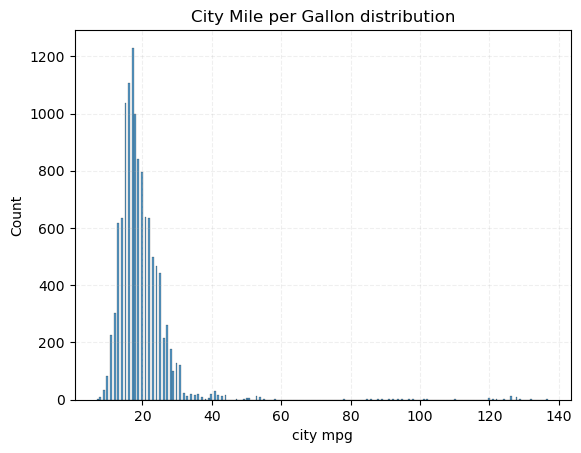

In [22]:
# histogram of prices
sns.histplot(data = df, x="city mpg")
plt.title("City Mile per Gallon distribution")
plt.grid(True, linestyle = "--",alpha = 0.2)
plt.show()


In [24]:
# average horsepower for each vehicle size
vehicle_size_hp = df.groupby("Vehicle Size")["Engine HP"].mean().reset_index().sort_values(by = "Engine HP",ascending = True)


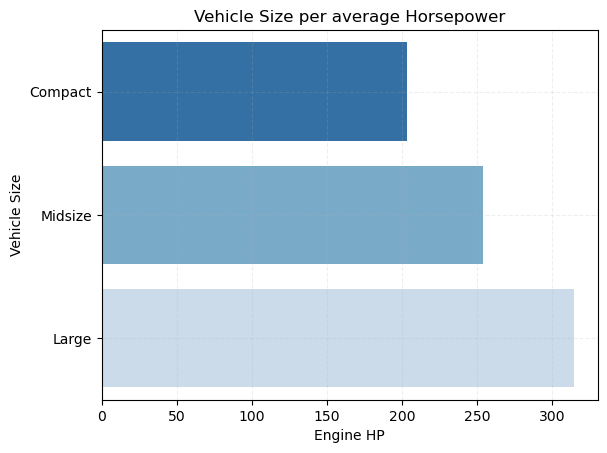

In [25]:
size_hp = sns.barplot(data = vehicle_size_hp,x="Engine HP",y="Vehicle Size",palette = "Blues_r")
plt.title("Vehicle Size per average Horsepower")
plt.grid(True, linestyle="--", alpha=0.2) 
plt.show()

<Axes: xlabel='Engine HP', ylabel='city mpg'>

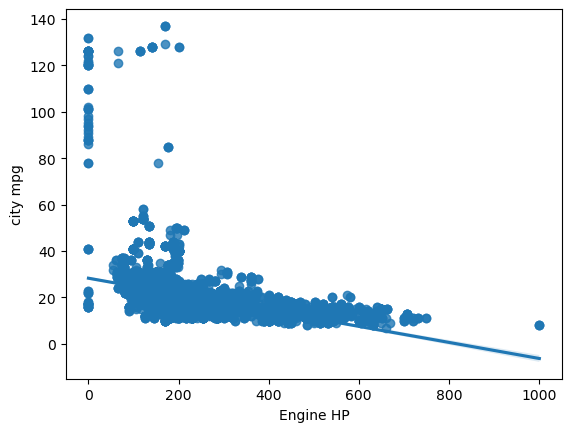

In [26]:
# correlation between horsepower and city miles per galon

sns.regplot(x='Engine HP', y='city mpg', data=df)

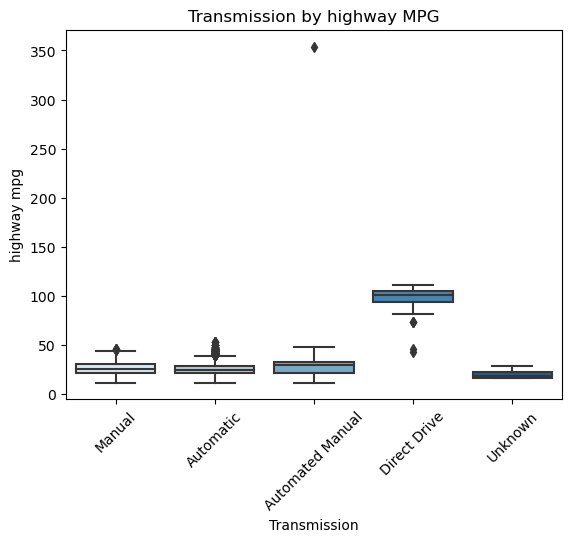

In [117]:
 #Which transmission type provides better fuel efficiency?
new_labels = ['Manual','Automatic','Automated Manual','Direct Drive','Unknown']
sns.boxplot(data = df,x="Transmission",y="highway mpg",palette = "Blues")
plt.xticks(ticks = range(len(new_labels)),rotation = 45,labels = new_labels)
plt.title("Transmission by highway MPG")
plt.show()
## best was direct_drive

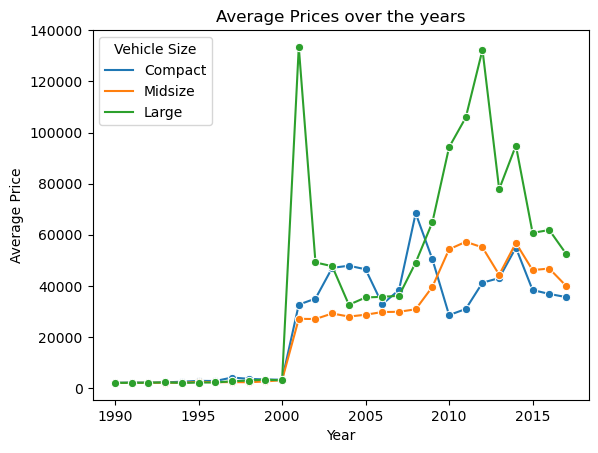

In [30]:
# How did the prices change over time
year_price = df.groupby("Year").agg(Average_Price = ("MSRP","mean")).round(2).reset_index() # if i wanted to show in table
sns.lineplot(data = df,x="Year",y="MSRP",errorbar = None,hue = "Vehicle Size",marker = "o")

plt.title("Average Prices over the years")
plt.ylabel("Average Price")
plt.show()

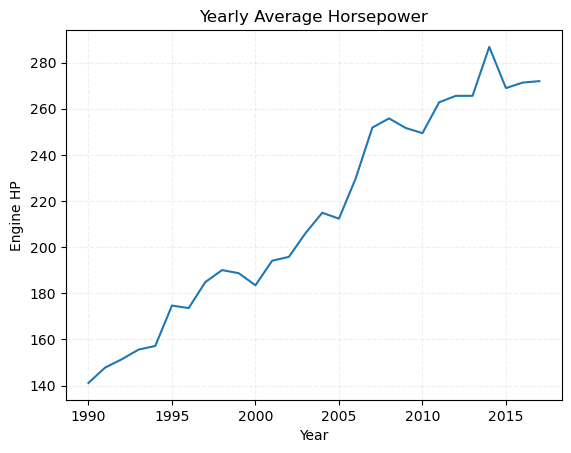

In [42]:
yearly_hp = sns.lineplot(data = df,x="Year",y="Engine HP",errorbar = None)
plt.grid(True,linestyle = "--",alpha = 0.2)
plt.title("Yearly Average Horsepower")
plt.show()


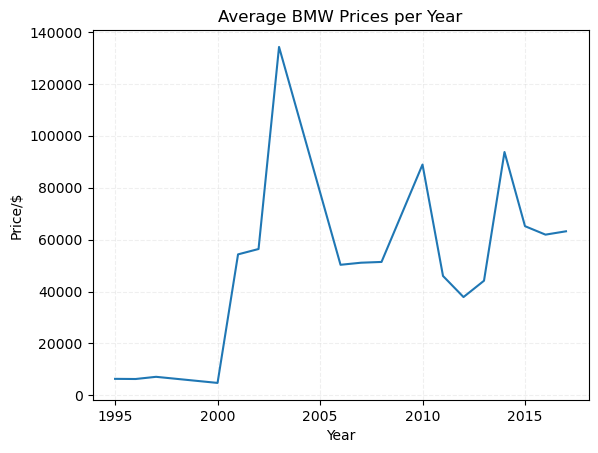

In [55]:
## yearly average Prices for BMW
filtered_df = df[df["Make"] == "BMW"]
grouped = filtered_df.groupby("Year")["MSRP"].mean().reset_index()
plot_bmw_hp = sns.lineplot(data = filtered_df,x="Year",y="MSRP",errorbar = None)
plt.title("Average BMW Prices per Year")
plt.ylabel("Price/$")
plt.grid(True,linestyle = "--",alpha = 0.2)
plt.show()


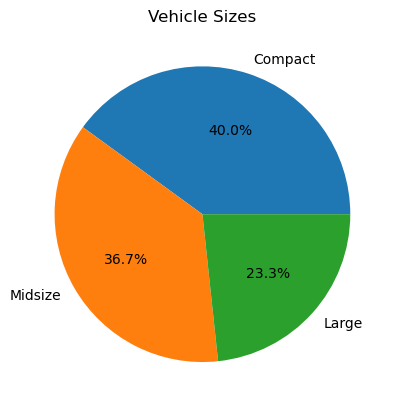

In [71]:
# Pie Chart 
vehicle_counts = df["Vehicle Size"].value_counts()
plt.pie(vehicle_counts,labels = vehicle_counts.index,autopct="%1.1f%%")
plt.title("Vehicle Sizes")
plt.show()

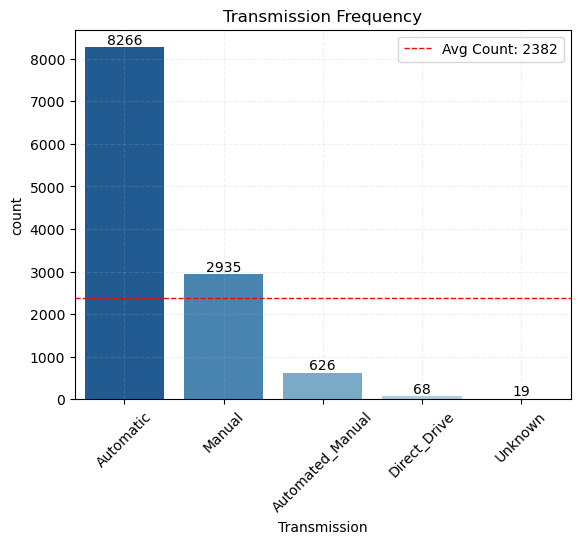

In [85]:
# Most common driven transmission
transmission_order = df["Transmission"].value_counts().index
transm_count = sns.countplot(data = df, x= "Transmission",order = transmission_order,palette = "Blues_r")
for p in transm_count.patches:
    height = p.get_height()
    transm_count.text(
        p.get_x() + p.get_width() / 2,  # x-position (center of the bar)
        height + 0.1,                   # y-position (just above the bar)
        f'{int(height)}',               # Value to display
        ha='center',                    # Horizontal alignment
        va='bottom'                     # Vertical alignment
    )
mean_count = df["Transmission"].value_counts().mean()
plt.axhline(mean_count, color='red', linestyle='dashed', linewidth=1, label=f'Avg Count: {int(mean_count)}')

plt.xticks(rotation = 45)
plt.grid(True,linestyle = "--",alpha = 0.2)
plt.title("Transmission Frequency")
plt.legend()
plt.show()

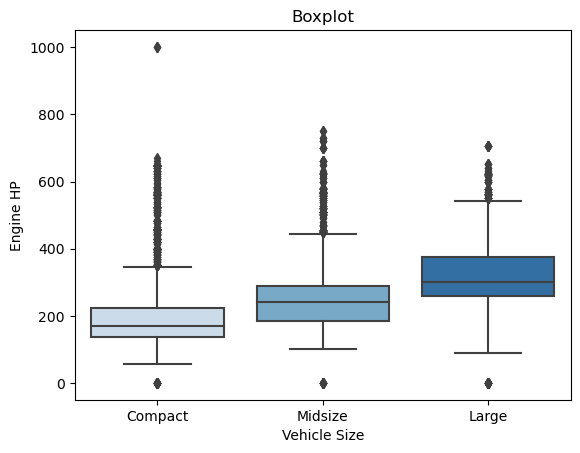

In [105]:
# boxplot showing the different vehicle sizes and average Horsepower
sns.boxplot(data=df, x="Vehicle Size", y="Engine HP",palette = "Blues")
plt.title("Boxplot")
plt.show()